# Facebook Stock Data Analysis

This notebook provides an end-to-end analysis of Facebook stock data. The objective is to perform exploratory data analysis (EDA), visualize trends, and derive insights about the stock's performance.

## Key Components:

1. Data Loading and Preprocessing:

    - Load historical Facebook stock data.
    
    - Convert the Date column into separate Day, Month, and Year columns for better analysis.

2. Exploratory Data Analysis (EDA):

    - Generate summary statistics to understand the central tendency and dispersion of numerical features.
    
    - Check for missing values and ensure data quality.
    
    - Analyze feature correlations using a correlation matrix and heatmap.

3. Data Visualization:

    - Box plots for all numerical features to detect outliers.
    
    - Line plots to visualize stock trends, including Open and Close prices over time.
    
    - Volume trends to analyze trading activity over the years.
    
    - Histograms to explore the distribution of features.

4. Feature Engineering (Optional):

    - Create derived features such as daily price change (Close - Open) and high-low spread (High - Low).

5. Insights and Observations:

    - Summarize findings based on statistical analysis and visualizations to interpret stock performance and trading trends.

## Conclusion

The notebook serves as a comprehensive guide for analyzing stock data, providing actionable insights for traders and analysts.



## Import Neseccary Package.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


## Loading the data.

In [2]:
data = pd.read_csv('data/FB_stock_history.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0


## Explanatory Data Analytics (EDA).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2359 non-null   object 
 1   Open          2359 non-null   float64
 2   High          2359 non-null   float64
 3   Low           2359 non-null   float64
 4   Close         2359 non-null   float64
 5   Volume        2359 non-null   int64  
 6   Dividends     2359 non-null   int64  
 7   Stock Splits  2359 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 147.6+ KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

## Data Preprocessing. 

In [6]:
# Convert the 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Extract day, month, and year into separate columns
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Drop the original 'Date' column
stock = data.drop('Date', axis=1)


In [7]:
stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year
0,42.049999,45.000000,38.000000,38.230000,573576400,0,0,18,5,2012
1,36.529999,36.660000,33.000000,34.029999,168192700,0,0,21,5,2012
2,32.610001,33.590000,30.940001,31.000000,101786600,0,0,22,5,2012
3,31.370001,32.500000,31.360001,32.000000,73600000,0,0,23,5,2012
4,32.950001,33.209999,31.770000,33.029999,50237200,0,0,24,5,2012


In [8]:
# Summary statistics
stock.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year
count,2359.000000,2359.000000,2359.000000,2359.000000,2.359000e+03,2359.0,2359.0,2359.000000,2359.000000,2359.000000
mean,139.606969,141.234324,137.958605,139.656876,3.095630e+07,0.0,0.0,15.778296,6.571429,2016.565494
std,84.490691,85.465048,83.566847,84.565640,2.778137e+07,0.0,0.0,8.746817,3.367869,2.728111
min,18.080000,18.270000,17.549999,17.730000,5.913100e+06,0.0,0.0,1.000000,1.000000,2012.000000
25%,74.935001,75.565002,74.020000,74.855000,1.564190e+07,0.0,0.0,8.000000,4.000000,2014.000000
50%,130.979996,132.259995,129.770004,131.050003,2.220590e+07,0.0,0.0,16.000000,7.000000,2017.000000
75%,184.914993,186.830002,183.419998,185.345001,3.597605e+07,0.0,0.0,23.000000,9.000000,2019.000000
max,381.679993,384.329987,378.809998,382.179993,5.735764e+08,0.0,0.0,31.000000,12.000000,2021.000000


## Visualizing Numerical Features with Box Plots.

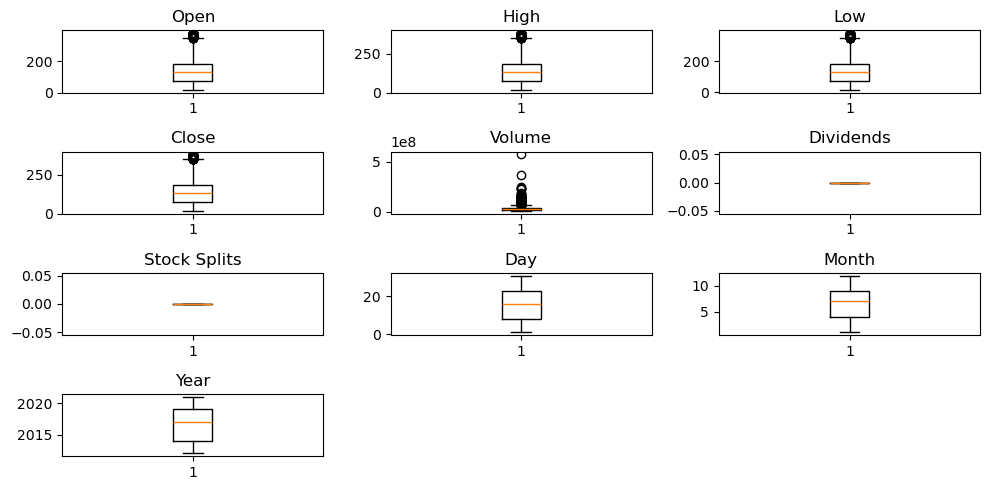

In [9]:
# Create box plots for each numerical feature

plt.figure(figsize=(10, 5))  

# Calculate the number of rows and columns for the subplot grid
num_cols = 3
num_rows = (len(stock.columns) + num_cols - 1) // num_cols

for i, col in enumerate(stock.columns):
    plt.subplot(num_rows, num_cols, i + 1) 
    plt.boxplot(stock[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Correlation Analysis.

Check the correlation between `numerical features` to identify relationships.

In [10]:
# Correlation matrix
correlation_matrix = stock.corr()
correlation_matrix


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year
Open,1.000000,0.999800,0.999778,0.999579,-0.425601,NaN,NaN,0.004661,-0.001588,0.946196
High,0.999800,1.000000,0.999718,0.999791,-0.421880,NaN,NaN,0.004761,-0.002752,0.947016
Low,0.999778,0.999718,1.000000,0.999804,-0.429973,NaN,NaN,0.003896,-0.001271,0.945513
Close,0.999579,0.999791,0.999804,1.000000,-0.426151,NaN,NaN,0.003853,-0.002313,0.946281
Volume,-0.425601,-0.421880,-0.429973,-0.426151,1.000000,NaN,NaN,0.086231,-0.013901,-0.457607
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,0.004661,0.004761,0.003896,0.003853,0.086231,NaN,NaN,1.000000,-0.002925,-0.005887
Month,-0.001588,-0.002752,-0.001271,-0.002313,-0.013901,NaN,NaN,-0.002925,1.000000,-0.128884
Year,0.946196,0.947016,0.945513,0.946281,-0.457607,NaN,NaN,-0.005887,-0.128884,1.000000


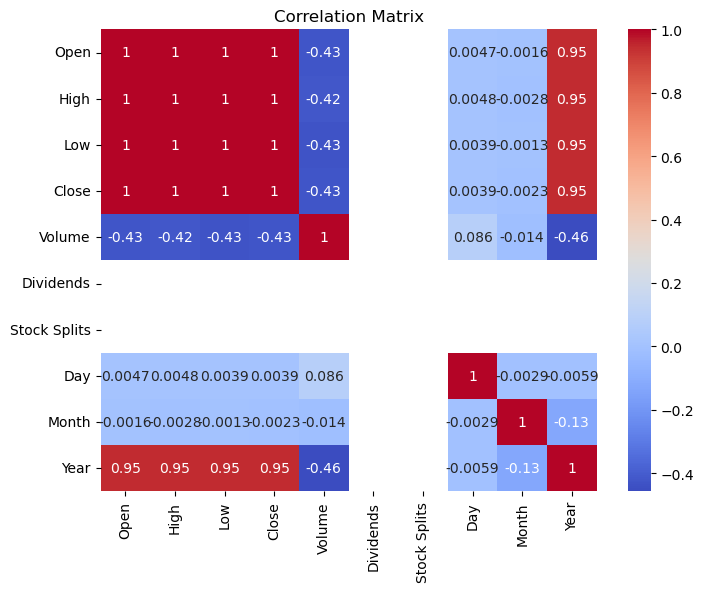

In [11]:
# Visualize the correlation using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Volume Analysis.

Understand trading activity over time.

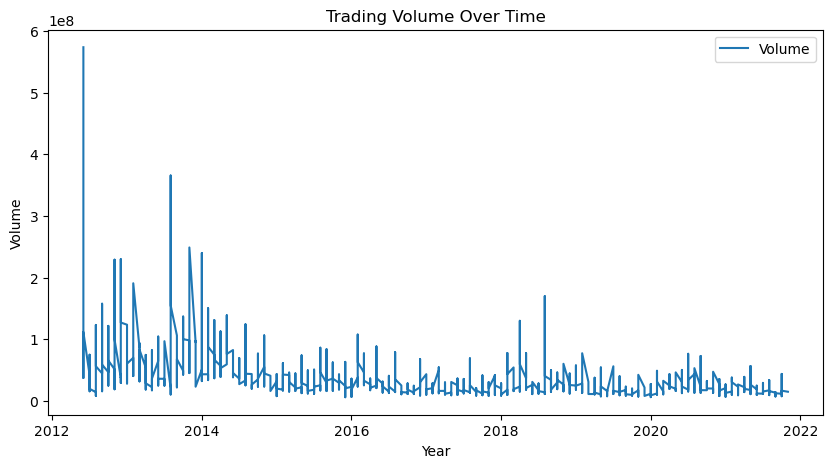

In [12]:
# Plot Volume over time (using Year, Month, and Day columns)
plt.figure(figsize=(10, 5))
plt.plot(stock['Year'] + stock['Month'] / 12, stock['Volume'], label='Volume')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()


## Outlier Detection.

Visualize the presence of outliers using box plots.

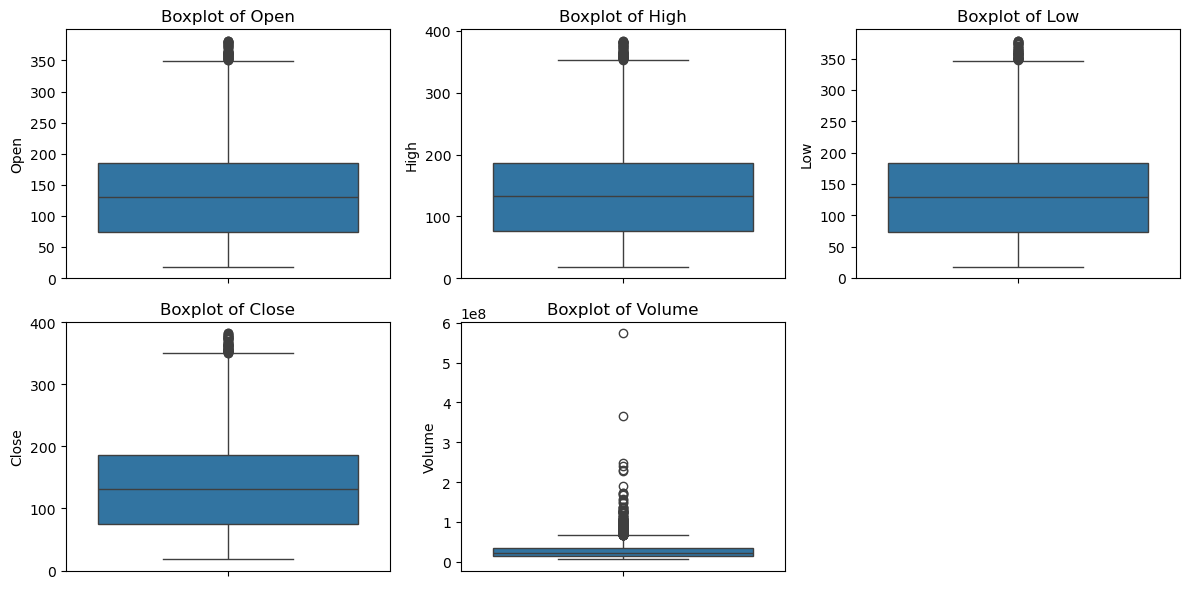

In [13]:
# Boxplot for key features
stock_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.figure(figsize=(12, 6))
for i, col in enumerate(stock_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=stock[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


## Trend Analysis.

Analyze stock price trends over time.

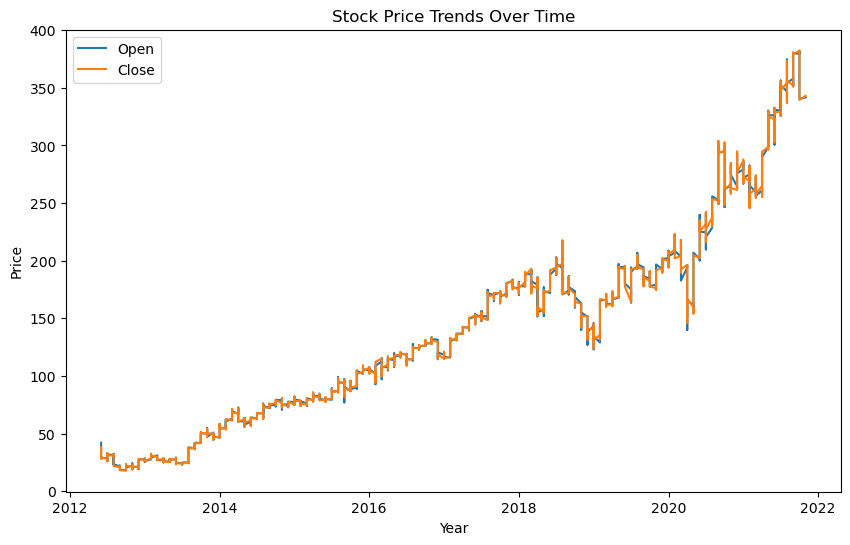

In [14]:
# Plot Open, High, Low, Close over time
plt.figure(figsize=(10, 6))
plt.plot(stock['Year'] + stock['Month'] / 12, stock['Open'], label='Open')
plt.plot(stock['Year'] + stock['Month'] / 12, stock['Close'], label='Close')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Stock Price Trends Over Time')
plt.legend()
plt.show()


## Distribution Analysis.

Understand the distribution of numerical features.

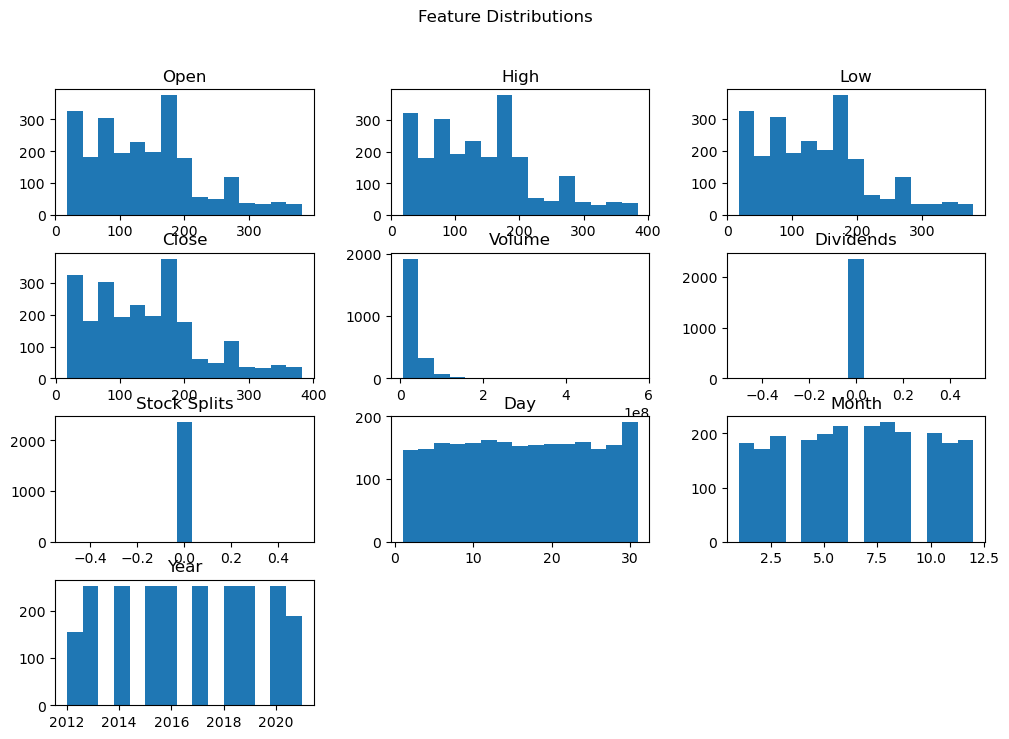

In [15]:
# Plot histograms for numerical features
stock.hist(bins=15, figsize=(12, 8), grid=False)
plt.suptitle('Feature Distributions')
plt.show()


## Feature Engineering.

- `Daily Price Change`: Difference between `Close` and `Open`.
- `High-Low Spread`: Difference between `High` and `Low`.

In [16]:
# Add new features
stock['Daily Change'] = stock['Close'] - stock['Open']
stock['High-Low Spread'] = stock['High'] - stock['Low']

# View updated dataset
stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Daily Change,High-Low Spread
0,42.049999,45.000000,38.000000,38.230000,573576400,0,0,18,5,2012,-3.820000,7.000000
1,36.529999,36.660000,33.000000,34.029999,168192700,0,0,21,5,2012,-2.500000,3.660000
2,32.610001,33.590000,30.940001,31.000000,101786600,0,0,22,5,2012,-1.610001,2.650000
3,31.370001,32.500000,31.360001,32.000000,73600000,0,0,23,5,2012,0.629999,1.139999
4,32.950001,33.209999,31.770000,33.029999,50237200,0,0,24,5,2012,0.079998,1.439999


## Summary

In this notebook, we conducted a detailed analysis of Facebook's historical stock data. By preprocessing the data and performing exploratory data analysis, we uncovered trends in stock performance, identified outliers, and analyzed trading activity. Key visualizations such as box plots, line charts, and correlation heatmaps provided deeper insights into the data. This analysis offers valuable perspectives for understanding historical stock trends and informs decision-making in stock trading and investment strategies.

